# Problem 3 a

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import collections
from sklearn import preprocessing
import math

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

data = pd.read_csv('spamAssassin.data',header=None,index_col=False)
P=np.array(data)
y=[]

for i in range(len(P)):
    if (P[i][0][0]=='0'):
        y.append(-1)
    else:
        y.append(1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(P, y,test_size=0.3,random_state=1 )

# Problem 3 b

In [2]:


counts_all=[]
counts_sum=dict()          #this is the vocabulary list
for i in range(len(y_train)):
    items = X_train[i][0].split(' ')
    counts_oneline = dict()   
    for j in items:
        counts_sum[j] = counts_sum.get(j, 0) + 1
        counts_oneline[j] = counts_oneline.get(j, 0) + 1
    counts_all.append(counts_oneline)

#a=sorted([(counter,word) for word,counter in counts_sum.items()],reverse=True) 

# if total smaller than 30,delete. also delete the keys of 1 and 0
for word,counter in counts_sum.copy().items():
    if (counter<30):
        counts_sum.pop(word)              
    if (word=='1'):
        counts_sum.pop(word)
    if (word=='0'):
        counts_sum.pop(word)
# appear fewer than 30 emails, delete
for word,counter in counts_sum.copy().items():
    n=0
    for i in range(len(y_train)):
        if word in counts_all[i].keys():
            n=n+1
    if (n<30):
        counts_sum.pop(word)                

#transform train data:each letter to a feature table        
X=[]
Xlenth=len(counts_sum)
for i in range(len(y_train)):
    a=np.zeros((Xlenth))
    j=0
    for word in counts_sum.keys():
        
        if word in counts_all[i].keys():
            a[j]=1
        j=j+1    
    X.append(a) 
    
#transform test data:each letter to a feature table      
Xtest=[]
for i in range(len(y_test)):
    a=np.zeros((Xlenth))
    j=0
    items = X_test[i][0].split(' ')
    counts_oneline = dict()
    for n in items:
        counts_oneline[n] = counts_oneline.get(n, 0) + 1
    for word in counts_sum.keys():

        if word in counts_oneline.keys():
            a[j]=1
        j=j+1
    
    Xtest.append(a)



# problem 3 c

In [3]:

def classification_vector(Xarray,yarray,epoch):
    w=np.zeros(len(Xarray[0]))   #Xlenth
    y_hat=np.ones(len(yarray))
    mistake=0
    epoch_number=epoch
    for n in range(epoch):
        for i in range(len(yarray)):
            y_hat[i]=np.sign(np.dot(Xarray[i],w))
            if (y_hat[i]==0):
                y_hat[i]=1
            
            if (y_hat[i] > 0):
                if (yarray[i]==-1):
                    w = list(map(lambda x,y: x-y, w,Xarray[i]))
                    mistake+=1
            if (y_hat[i] < 0):
                if (yarray[i]==1):
                    w = list(map(lambda x,y: x+y, w,Xarray[i]))
                    mistake+=1
        if(accuracy_score(yarray, y_hat)==1):
            epoch_number=n
            break

    return w, epoch_number,mistake

def test_error(vector,Xarray,yarray):
    y_hat=np.sign(np.dot(Xarray,vector))
    for i in range(len(yarray)):    
        if (y_hat[i]==0):
            y_hat[i]=1
    error=1-accuracy_score(yarray, y_hat)
    return error

# problem 3 d

In [4]:
w,epochs,mistake=classification_vector(X,y_train,23)
print('the epochs number is',epochs)
print('The number of mistakes made before algorithms terminate is',mistake)
error_train=test_error(w,X,y_train)
error_test=test_error(w,Xtest,y_test)

print('the train error is',error_train)
print('the test error is',error_test)

the epochs number is 21
The number of mistakes made before algorithms terminate is 423
the train error is 0.0
the test error is 0.0194444444444


# problem 3 e

In [5]:
def average_vector(Xarray,yarray,epoch):
    w_list=[]
    w=np.zeros(len(Xarray[0]))   #Xlenth
    y_hat=np.ones(len(yarray))
    
    epoch_number=epoch
    for n in range(epoch):
        for i in range(len(yarray)):
            y_hat[i]=np.sign(np.dot(Xarray[i],w))
            if (y_hat[i]==0):
                y_hat[i]=1
            
            if (y_hat[i] > 0):
                if (yarray[i]==-1):
                    w = list(map(lambda x,y: x-y, w,Xarray[i]))
                    
                    w_list.append(w)
            if (y_hat[i] < 0):
                if (yarray[i]==1):
                    w = list(map(lambda x,y: x+y, w,Xarray[i]))
                    
                    w_list.append(w)
        if(accuracy_score(yarray, y_hat)==1):
            epoch_number=n
            break
    w=np.mean(w_list,axis=0)

    return w, epoch_number

# problem 3 f

In [6]:
w,epochs=average_vector(X,y_train,23)


print('the epochs number is',epochs)

error_train=test_error(w,X,y_train)
error_test=test_error(w,Xtest,y_test)

print('the train error is',error_train)
print('the test error is',error_test)


the epochs number is 21
the train error is 0.00285714285714
the test error is 0.0177777777778


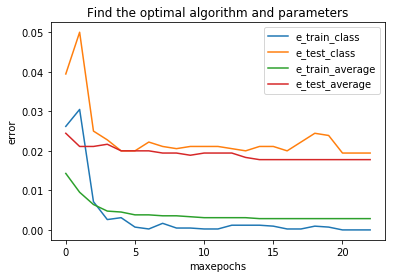

In [8]:
maxepochs=np.arange(23)
e_train_class=[]
e_test_class=[]
e_train_average=[]
e_test_average=[]
for i in maxepochs:
    w_class,k,mistake=classification_vector(X,y_train,i+1)
    error_trainc=test_error(w_class,X,y_train)
    error_testc=test_error(w_class,Xtest,y_test)
    e_train_class.append(error_trainc)
    e_test_class.append(error_testc)
    
    w_av,k=average_vector(X,y_train,i+1)
    error_traina=test_error(w_av,X,y_train)
    error_testa=test_error(w_av,Xtest,y_test)
    e_train_average.append(error_traina)
    e_test_average.append(error_testa)  
    
plt.plot(maxepochs, e_train_class,label='e_train_class')
plt.plot(maxepochs, e_test_class,label='e_test_class')
plt.plot(maxepochs, e_train_average,label='e_train_average')
plt.plot(maxepochs, e_test_average,label='e_test_average')
plt.legend()
plt.xlabel('maxepochs')
plt.ylabel('error')
plt.title('Find the optimal algorithm and parameters')
plt.axis('tight')
plt.show()

# problem 3 g

In [22]:

Xall=np.vstack((X,Xtest))
yall=np.array(y_train+y_test)

skf = StratifiedKFold(n_splits=5)
error=[]
w_list=[]
for train, test in skf.split(Xall,yall):
    X_trainl, X_testl = Xall[train], Xall[test]
    y_trainl, y_testl = yall[train], yall[test]
    w_one,epochs=average_vector(X_trainl,y_trainl,21)
    error.append(test_error(w_one,X_testl,y_testl))
    w_list.append(w_one)
    
error_sort=np.argsort(error)
index=error_sort[0]
w_op=w_list[index]
print('the best parameter w is',w_op)
error_all=test_error(w_op,Xall,yall)
print('the expected predictive error of this algorithm is',error_all)

the best parameter w is [-6.5959596   2.73939394 -1.57575758 ...,  0.20808081  0.          2.5979798 ]
the expected predictive error of this algorithm is 0.0045


# problem 3 h

In [24]:
w_sort=np.argsort(w_op)
index_positive=w_sort[-15:]
index_negative=w_sort[0:15]

i=0
positive=[]
negative=[]
for word in counts_sum.keys():
    if i in index_positive:
        positive.append(word)
    if i in index_negative:
        negative.append(word)
    
    i+=1
print('the most positive words are:',positive)
print('the most negative words are:',negative)    

the most positive words are: ['your', 'busi', 'these', 'our', 'remov', 'click', 'deathtospamdeathtospamdeathtospam', 'sight', 'am', 'guarante', 'hour', 'market', 'monei', 'internet', 'opportun']
the most negative words are: ['messag', 're', 'i', 'file', 'chang', 'tuesdai', 'wrote', 'those', 'set', 'copyright', 'still', 'prefer', 'version', 'sai', 'announc']


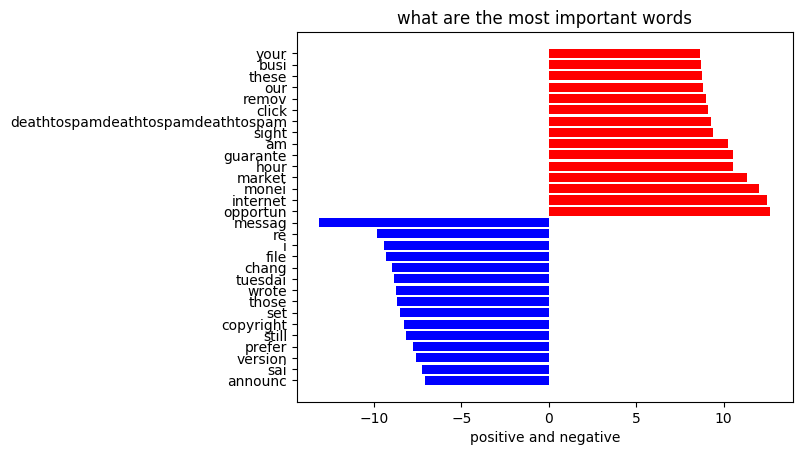

In [39]:
plt.rcdefaults()
fig, ax = plt.subplots()

words = positive + negative
y_pos = np.arange(len(words))
performance = np.concatenate((w_op[index_positive],w_op[index_negative]))
colors = []
for i in range(15): 
    colors.append('r')
for i in range(15):
    colors.append('b')

ax.barh(y_pos,performance,align='center',color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(words)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('positive and negative')
ax.set_title('what are the most important words')

plt.show()